# <center>Exploring the effects  of government policies and vaccination rates on covid infection rates in Singapore</center>

# 1 Aims, objectives and background

## Introduction

Covid-19 has grasp the world in a tight grip. Slowing down economies and affecting many lives in the process. To date, Singapore is better equipped in dealing with infections through measurements implemented by the Singaporean Government, while opening our borders to the world. There are collections of data out there recording infection rates and vaccination rates, but how can we use the information attained to aid our understanding to be prepared in the event of another outbreak.

In this report, I want to explore the deductions using data science techniques to make sense of what it is out there. To fill in the gaps and make comparisons of the effectiveness on certain measures against the infection rate. Yes, there are comparisons between vaccination and infections rates but in the analysis projects that I have researched on they did not dive into depth on the effectiveness of GOVERNMENT POLICIES against the two comparisons that I listed earlier on. There was a consideration to analyse another variable of public sentiments on vaccinations in the country, however I decided against that due to the lack of relevance in conjunction with Government Policies implemented. This is because, the government made it compulsory for all residents in the country to be vaccinated or be stripped of certain benefits like entering shopping malls. An exception was made for those who had underlying health conditions to allow them to have a choice to be vaccinated [1].

I will use the covid-19 situation in Singapore as an example for my analysis. Data taken would be from sources of Government websites and local news publications.


## 1.1 Aims and objectives 

I will investigate the following in this project:

1. Vaccination rate against the infection rate in Singapore 
2. Vaccination rate together with the Government policies against infection rates in Singapore 

My AIMS are to:

1. Collect DATA FOR VACCINATION rates and Covid-19 Infection rates  
2. Clean and REPRESENT THE DATA in a clear and concise format for interpretation
3. Find out the start and end dates of different phases and plot them on graph for comparison.
4. Explore other areas of the project for expansion 

Objectives:

To fulfil the aims stated above I will:

1. Collate the data and take note of how it's data frame is formated
2. Work with the given data to represent then in line and bar charts
3. Make comaparisons of effectiveness of what we wish to find in our aims.

# 1.2 Data 


## Data requirements
Covid-19 data on vaccination and infection rates would be acquired in CSV files readily made available through government websites. These data sets will show the lows and highs of the vaccination and infection rates, through a "period" of when it was first detected in Singapore, until our current time period Depending on the amount of data, it will determine the type of data representation to allow for all of it to be shown clearly. Government policies will be manually searched, so no data is needed as the information pool will be small. 

## Choice of Data

1. **data.gov.sg**: 

The data obtained is the most credible and reliable source of covid-19 cases and vaccination rates in Singapore [5], because it is from the official Government Website. We obtain their CSV files provided on the website. There are data sets that we obtained from the website, one for Covid-19 infection rates and the other for Vaccination rates within the country, both are suitable for what I'm looking to explore in this analysis. For a more in depth view of what is in the CSV files, the indexes would be from the start dates of cases and vaccinations till the most recent date that it was recorded. The following column thereafter is carefully picked out to represent what the comparisons I wish to explore. When comparing infection vs vaccination, rates we manipulated the data set of infection rates in order to fit the time frame of covid infection rates within vaccination. This is because the time frame for when vaccinations started was at a later period.

I considered two other data sets, one from "kaggle". Kaggle is a subsidiary of Google LLC to allow data scientist to collaborate with each other and showcase their research projects. The strengths of this particular dataset from kaggle [6] is it gives a very descriptive overview on the effectiveness of covid management plans should someone be positive for it. The weakness is that it is too "clean" which does not give me the opportunity to do much manipulation. Taking into account the recency of the data set, it is too short making it difficult to compare with another data set of the same topic but a different time frame. The other data set I considered was the "Week on Week infection ratio" [2], the time period of the data set is very short not allowing me to make a comparison. However, the strength attaining the ratio of infections allows us to make a comparison between the total infection per week based on the entire population. 

2. **The Straits Times and Today Online**: 

Data collected from local publications allows me find a definitive definition about the conditions in different government policies during the control phases leading up to the easing of the restrictions. Besides these publications being reliable, a possible downside to this would be in the form of the government having control over what news publications can say. Having to seek clearance for certain articles before being published, assertain biasness towards the local government.

## Limitations and constraints of the data

To reiterate my point earlier, data from Vaccination and Infection rates begin at different time frames, with the latter being earlier. This is due to vaccinations being distributed to the citizens at a later timing. Infection rate data might not be as accurate at the start due to the time taken for certain measures to take place, and rolling out of covid testing centres as well as the covid-19 tracking app. The timeline of publication may be scattered across different periods. 

# 1.3 Ethical considerations

## Use of Data and Articles 

There was consent given by the government website to access the data for personal use. The data is made open to public usage with consent given [7]. Articles collected and analyzed will be from local news publications, hence there won't be any issues of anonymity. The data found in this analysis would also be readily accessible to anyone interested in continuing this research.

Evaluating the data being used in this analysis, I have viewed that the data being used comply with the terms and conditions stated in their individual websites as follows:

1. **data.gov.sg**: This website states that we are able to make use of the data be it commercially or non-commercially. The data does not give us rights to use it under any third-party endorsements or rights over any personal data that may be found within the data.

2. **The Straits Times**: The Straits Times who is under Singapore Press Holdings, allows it's content for personal use. To retrieve and display their content in our own devices, as long as it's not used commercially. 

3. **Today Online**: Based on the "Usage Restrictions" of the website, we will not be violating it's term and conditions in any shape or form, in the Usage of the websites data.

I have done the necessary due dilegence and have found the following:

- If someone else where to replicate or continue with the development of this analysis, they would not face problems with any legal issues in accessing and using the data. 

- The implications of this analysis do not promote harmful assumptions to any of the parties listed in this research. This project looks at the effects of covid-19 and it's strategies to combat the spread. It does not specifically imply any negative connotations to the inference of the data represented. This project does not associate itself with any political agenda publishers or the data itself has. It purely looks at the facts and analysis that this research presents.

# 2 Plotting Data into Charts

In [1]:
# Import libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import matplotlib.dates as mdates
import seaborn as sns
import requests

## 2.1 Creating Function to Plot Line Charts

In [2]:
def line_chart(rows, days, date, data, x_name,y_name,title,x1_legend,x2_legend):
    
    fig, axs= plt.subplots(1,figsize=(20,10))
    #changing the tick figure from le 6 to millions
    plt.ticklabel_format(style='plain') 
    # np.arrange looks at the number of rows
    plt.setp(axs, xticks= np.arange(0, rows, days), xticklabels=date)

    axs.plot(data)

    plt.xlabel(x_name, fontsize=14)
    plt.ylabel(y_name, fontsize=14)
    plt.xticks(rotation=45)
    plt.grid()

    axs.set_title(title, size= 20)
    axs.legend([x1_legend,x2_legend],fontsize = 14)

## 2.2 Consolidating Data for Singapore Covid Case Numbers

In [3]:
infected = pd.read_csv("covid-19-case-numbers/epidemic-curve.csv", 
                       sep=',', 
                       parse_dates=True)
infected

,date,type,value
0,2020-01-23,Imported,1
1,2020-01-23,Local,0
2,2020-01-24,Imported,2
3,2020-01-24,Local,0
4,2020-01-25,Imported,1
...,...,...,...
2065,2022-11-20,Local,1026
2066,2022-11-21,Imported,151
2067,2022-11-21,Local,947
2068,2022-11-22,Imported,298


In the columns above, these are dates In which the data is collected, followed by the "type": if they are local or imported, and finally the "value": The infection numbers collected for that day for the particular type.

## Cleaning of Infection Rate Data Set 

From the table represented above, it is not suitable to be plotted on a graph. In the code below, I used "pandas.DataFrame_pivot_table" to shift the entire type column so that dates are the indexes and the number of local and imported cases are the columns above. This would allow for the data for both variables to be plotted sperately on one graph.

In [4]:
infected_pivot = infected.pivot_table(
        values='value', index='date', columns='type')
infected_pivot

type,Imported,Local
date,,
2020-01-23,1,0
2020-01-24,2,0
2020-01-25,1,0
2020-01-26,0,0
2020-01-27,1,0
...,...,...
2022-11-18,235,1673
2022-11-19,207,1459
2022-11-20,141,1026


## Tailoring time frame for infection rates for comparison with vaccination rates

To make an accurate comparison of infection and vaccination rates, it is better to have them during the same time frame in order to see the effects that one has on the other. Therefore, what I'm doing in the data frame below is to specify the index of dates that I want to be represented within the same time frame as vaccination rates. Hence, the number 344 below, indicating the row with the same start date I would like to be represented.

In [5]:
cases_length = len(infected_pivot)
cases_comparison= infected_pivot.iloc[344:cases_length]

cases_comparison

type,Imported,Local
date,,
2021-01-01,28,2
2021-01-02,33,0
2021-01-03,35,0
2021-01-04,24,0
2021-01-05,27,1
...,...,...
2022-11-18,235,1673
2022-11-19,207,1459
2022-11-20,141,1026


## Describtion of Infected Cases Data Frame

The table below shows a comparison between the mean number of local against imported cases. 

In [6]:
cases_comparison.describe()

type,Imported,Local
count,691.000000,691.000000
mean,116.314038,2920.476122
std,146.454835,4092.589309
min,0.000000,0.000000
25%,9.000000,19.000000
50%,38.000000,1657.000000
75%,177.000000,3686.000000
max,892.000000,25731.000000


## Plotting line chart

The line graph plotted shows the comparison between the total covid infection cases from February 2020 till November 2022. It gives an overview on the number of imported against local cases In a line graph format.

We would first be looking at the data to determine if it is suitable for representation on a graph.

From our analysis on the data sets, we see in 2.2, the covid cases saw a small spike from April 2020 till Mid August 2020 owing to the start of the covid-19 infection in Singapore [9][10][11]. From September 2020 till July 2021 the rate of infection picking with the highest spike in covid-19 infection seen in Mid Febraury, with close to 25000 cases recorded. In 2.3 on the other hand, we start to see the rise in vaccination numbers from January 2021, peaking around June 2022. 

Comparing the line charts of both variables on it's own, we don't seem to see a correlation between the vaccination rates and the covid-19 infection numbers. In this case, while the vaccination rates have been increasing, covid cases have seem to continue with 3 bouts of spikes seen in chart 2.4.1.

In [7]:
# Set the range of dates for total infection cases
dates = pd.date_range('2020-01-23','2022-11-22', 
              freq='MS').strftime("%b-%Y").tolist()

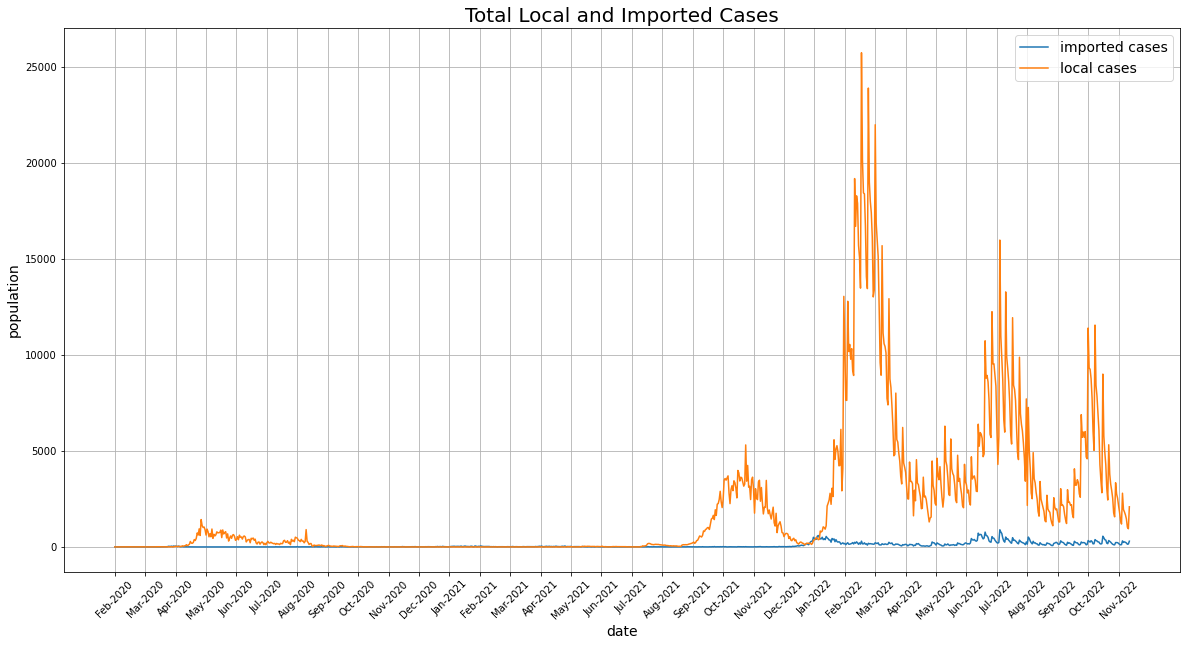

In [8]:
#plotting line chart for infection rate
line_chart(1035,
           31,
           dates,
           infected_pivot,
           'date',
           'population',
           'Total Local and Imported Cases',
           'imported cases',
           'local cases')

## 2.3 Consolidating Data for Singapore Vaccination Numbers

In variable "vac_dates" below, I determined the date range based on the start and most recent data collected for vaccinations.

In [9]:
# Determining the range of dates for Vaccination Numbers
vac_dates = pd.date_range('2020-12-30','2022-11-08', 
              freq='MS').strftime("%b-%Y").tolist()

In [10]:
# Assessing Data from Vaccination File
vaccinated = pd.read_csv("covid-19-vaccination/primary-series-vaccination-take-up-by-population.csv")

vaccinated

,vacc_date,received_at_least_one_dose,full_regimen,received_one_dose_pcttakeup,full_regimen_pcttakeup
0,2020-12-30,532,36,0,0
1,2020-12-31,575,45,0,0
2,2021-01-01,603,47,0,0
3,2021-01-02,636,49,0,0
4,2021-01-03,670,52,0,0
...,...,...,...,...,...
674,2022-11-04,5167418,5126014,93,92
675,2022-11-05,5167784,5126352,93,92
676,2022-11-06,5167792,5126393,93,92
677,2022-11-07,5168342,5126926,93,92


The line graph plotted below shows Singapore's Vaccination Rate from January 2021 till November 2022. Data selected was for those that received at least one dose.

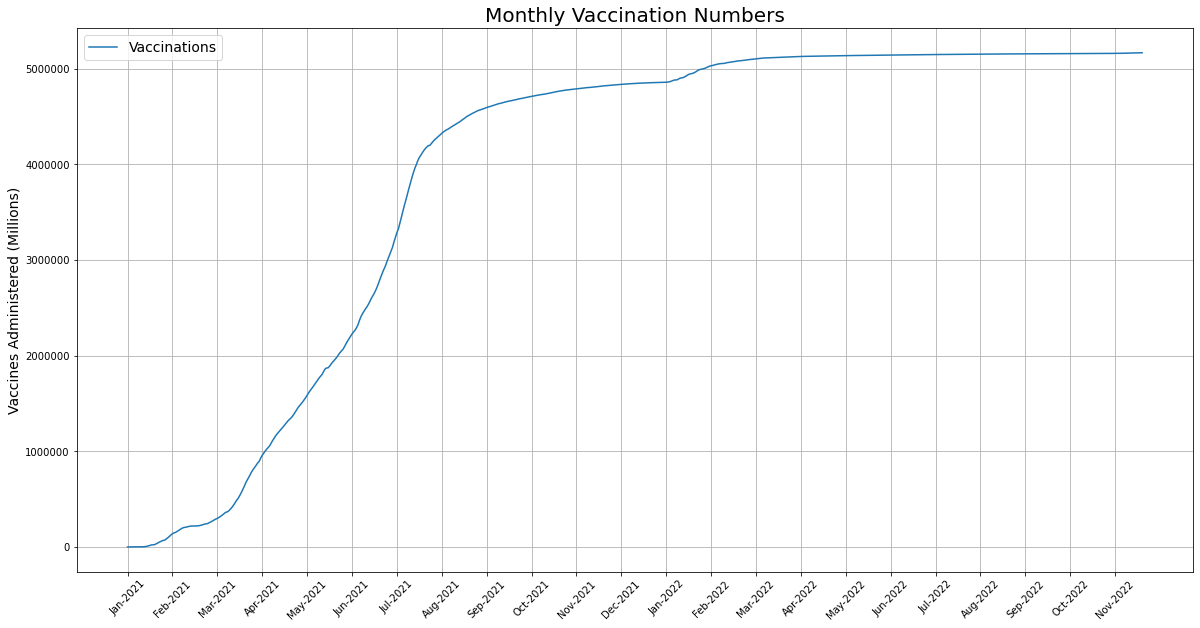

In [11]:
# Plotting Line Chart for Vaccination Rate

line_chart(680,
           30,
           vac_dates,
           vaccinated['received_at_least_one_dose'],
           '',
           'Vaccines Administered (Millions)',
           'Monthly Vaccination Numbers',
           'Vaccinations',
           '')

## 2.4.1 Combining Infection and Vaccination Charts

In this line graph, we take both graphs for Infection and Vaccination rates and plot then together to allow us to see a better comparison. We trimmed the time period for Infection rates to make sure it falls within the same time frame as when the vaccination started. This is to allow for a more credible comparison, to see the effects of vaccinations. I also shaded the periods in which there were different phases of Government restrictions based on data attained [8].

In [12]:
# Function to Plot date range blocks
def phase_range(start,end,color):
    ax2.axvspan(start, 
                end,
                facecolor=color, edgecolor='none', alpha=.2)

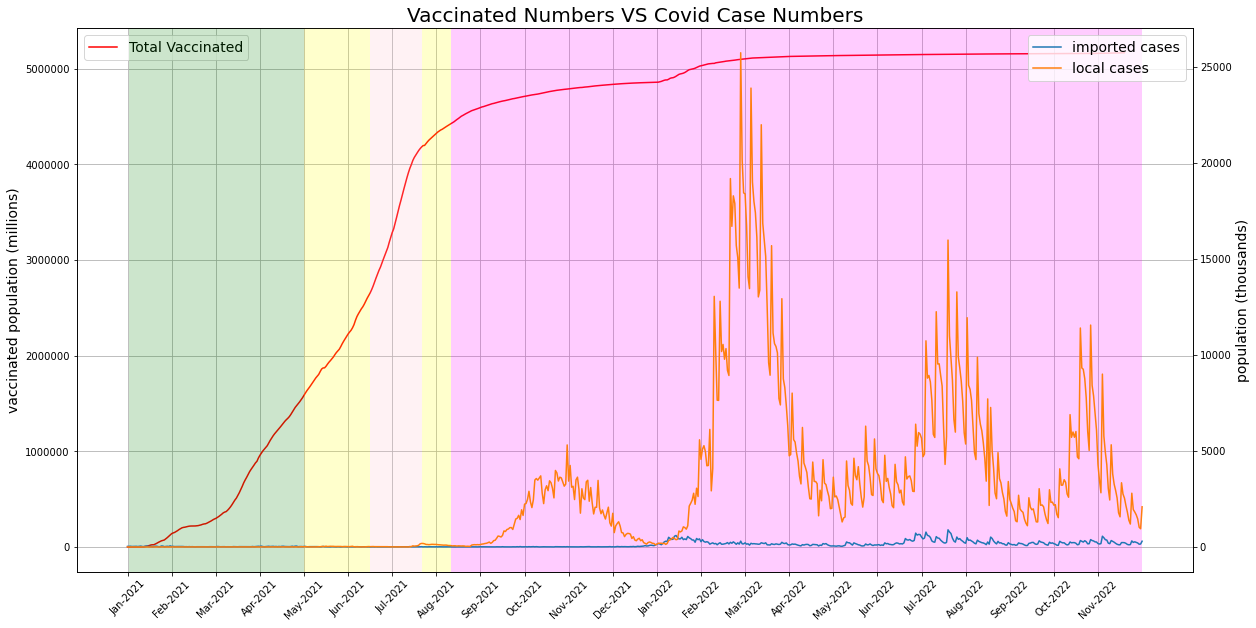

In [13]:
# PLOT DAILY VACCINATED 
fig, ax1= plt.subplots(1,figsize=(20,10))
# set up
plt.ticklabel_format(style='plain') #changing the tick figure from le 6 to millions
plt.setp(ax1, xticks= np.arange(0, 680, 30), xticklabels=vac_dates)

# plot chart
ax1.plot(vaccinated['received_at_least_one_dose'], label= 'Total Vaccinated', c='Red')

# axis and legend settings
ax1.set_ylabel('vaccinated population (millions)', size= 14)
ax1.set_title('Vaccinated Numbers VS Covid Case Numbers', size= 20)
plt.xticks(rotation=45)
plt.grid()

ax1.legend(loc="upper left", fontsize = 14)

# PLOT DAILY COVID CASES
ax2 = ax1.twinx()

# set up
# np.arrange inputs range of rows 
# use vac_dates as well to get same timeframe
plt.setp(ax2, xticks= np.arange(0, 680, 30), xticklabels=vac_dates) 
ax2.xaxis.tick_top()

# plot chart
ax2.plot(cases_comparison)

# axis and legend settings
plt.xlabel('date', fontsize=14)
plt.ylabel('population (thousands)', fontsize=14)
plt.grid(False)
ax2.legend(['imported cases','local cases'], loc="upper right", fontsize = 14)

# Shading out time frame of phases

# Phase 3
phase_range(1,120,'green')
# Phase 2 / Phase (Heightened Alert)
phase_range(120,165,'yellow')
# Phase 3 (Heightened Alert)
phase_range(165,200,'pink')
# Phase 2 / Phase (Heightened Alert)
phase_range(200,220,'yellow')
# Preperatory/ Stabilization/ Transition Phase
phase_range(220,690,'magenta')

In the graph above, the colours of phases are indicated below.

- GREEN: Phases 3 
- YELLOW: Phase 2 / Heightened Alert
- PINK: Phase 3 Heightened Alert
- MAGENTA: Preperatory/ Stabilization/ Transition Phase

## 2.4.2 Government Covid-19 Policies and it's Infection Rate

Description of Covid Phases:

1. Circuit Breaker: Full lockdown. Citizens cannot leave homes and adhere to strict safety distancing if they have to go out.
2. Phase 1: Safe Re-opening workplaces and schools. Homes can only recieve 2 visitors a day. Everyone should leave home for essentials and mask is compulsory when going out
3. Phase 2: Activities resume, almost entire economy open. Mask-on rule when outside homes will still be implemented
4. Phase 3: Slow re-opening of borders. Safety distancing rule is to be adhered to and mask-on policy is still in effect

In [14]:
phases = pd.read_csv('/Users/markcheong/Desktop/SIM-UOL/Programming With Data CM2015/PWD Midterm Proj/covid19_sg.csv')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


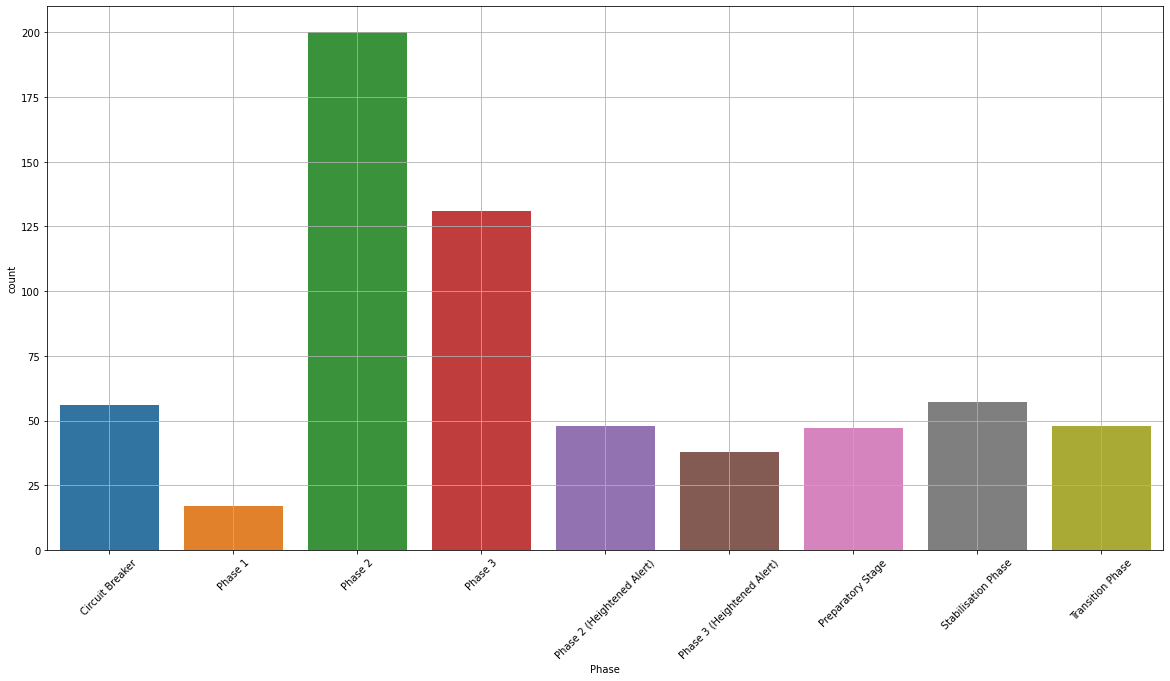

In [15]:
# plot phases with number of cases 
plt.figure(figsize=(20,10))

sns.countplot(phases['Phase'])
plt.xticks(rotation=45)
plt.grid()

# Summary 

## Conclusion

Common knowledge about the effects of a vaccination is that it is suppose to have a positive effect in reducing the amount of infections in a population [12]. However, we see the opposite happening within 2.4.1. So why then was there a period of little to no infection cases from September 2020 till July 2021 but the sudden increase in cases after July 2021. There is a possibility that Government Policies have a positive impact in regulating the spread of covid-19 [9][10][11]. Those sudden spikes that we saw may be due to asymptomatic [13] cases of covid-19 infection which can lie undetected even with a covid-19 test kit.

## Further Exploration of Analysis 

Twitter Webscrapping can be used as an idea for further development of this project. We can see that Twitter as a platform is used to share certain ideas and thoughts of the public. Sentiment Analysis [3] can be used to determine the general emotions and feeling surrounding local Singaporeans during the Covid-19 pendemic. Sentiments collected can then be compared to that of the vaccination rate, and it might give reason for the sudden spikes in infection rates within the country.

# References and Resources

## References
[1] Infection prevention guidelines for schools - ministry of health. (n.d.). Retrieved December 7, 2022: https://www.moh.gov.sg/docs/librariesprovider5/default-document-library/annexbb44528cbc27b4ceb9571fb222a0c5777.pdf

[2] Health, M. o. (2021, October 26). Week on Week Infection Ratio. Retrieved from data.gov.sg: https://data.gov.sg/dataset/covid-19-case-numbers?resource_id=99334c54-479f-472d-a6f5-fe38d2f9b1aa

[3] Circle, P. (2022, December 7). Scraping tweets using BeautifulSoup. Retrieved from Python Circle: https://pythoncircle.com/post/522/python-script-7-scraping-tweets-using-beautifulsoup/

[4] Goh, T. (2022, March 29). New Covid-19 rules kick in: Timeline of S'pore's measures over the last 2 years. Retrieved from Straits Times: https://www.straitstimes.com/singapore/two-years-of-twists-and-turns-a-timeline-of-singapores-covid-19-measures

[5] Covid-19 case numbers. Data.gov.sg. (n.d.). Retrieved December 7, 2022, from https://data.gov.sg/dataset/covid-19-case-numbers?resource_id=400a3eb4-8702-4050-9700-988bfea7a20f 

[6] Usmani. (2018). Kaggle. Retrieved from https://www.kaggle.com/getting-started/44916

[7] Gov.sg. (2022). Singapore Open Data License. Retrieved from Data.gov.sg: https://data.gov.sg/open-data-licence

[8] Shivam. (2022). Kaggle. Retrieved from github: https://raw.githubusercontent.com/shivam5992/temp-datasets/master/covid19_sg.csv

[9] safely. Retrieved from gov.sg: https://www.gov.sg/article/ending-circuit-breaker-phased-approach-to-resuming-activities-safely

[10] Health, M. o. (2022, October 10). Transition Phase to COVID-19 Resilience . Retrieved from MOH: https://www.moh.gov.sg/covid-19-phase-advisory

[11] Gov.sg. (2020, April 3). COVID-19 circuit breaker: Heightened safe-distancing measures to reduce movement. Retrieved from gov.sg: https://www.gov.sg/article/covid-19-circuit-breaker-heightened-safe-distancing-measures-to-reduce-movement

[12] CDC. (2022, May 23). Understanding How Vaccines Work. Retrieved from CDC: https://www.cdc.gov/vaccines/hcp/conversations/understanding-vacc-work.html

[13] Yetmann, D. (2022, March 30). What to Know About Asymptomatic COVID-19. Retrieved from healthline: https://www.healthline.com/health/what-is-asymptomatic-covid

## Resources
- https://data.gov.sg/dataset/covid-19-vaccination (Vaccination Rates)

- https://data.gov.sg/dataset/covid-19-case-numbers?view_id=f9332fed-8736-43b2-ad63-5703da100948&resource_id=400a3eb4-8702-4050-9700-988bfea7a20f (Covid-19 Infection Rates)

- https://raw.githubusercontent.com/shivam5992/temp-datasets/master/covid19_sg.csv (Data for Phases)